## Results from Section 6.8.

Data is for 3D quantities using the normal FoV and the distribution method.  Comparison between the results using different DM mass profiles. 

Model1 - gNFW; Model4 - gNFW with scalse radius fixed at 10 Reff;

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
from astropy.io import fits

## Results whitin  2.5R$_{\text{Eff}}$

In [2]:
# Column 0 for Jam result, Column 1 for dyLens 
subhalos = ["7", "8", "9", "11", "20", "56405", "56406", "83991",
            "83996", "84010", "100675", "116278", "172209", "313415", 
            "341482", "344595", "396742", "414107", "451938", "485608",
            "545285"]
Nsubhalos = len(subhalos)  # Number of subhalos

Mstar  = np.empty([Nsubhalos]) # "True" stellar mass
Mdm    = np.empty([Nsubhalos]) # "True" dm mass
Mtotal = np.empty([Nsubhalos]) # "True" total mass
Mfdm   = np.empty([Nsubhalos]) # "True" dark matter fraction


### JAM models

In [3]:
    # Where to store the Fractional difference
Jam_star_model1 = np.empty([Nsubhalos])       # JAM measurement of stellar mass 
Jam_star_model4 = np.empty([Nsubhalos])       # JAM measurement of stellar mass 

Jam_DM_model1 = np.empty([Nsubhalos])         # JAM measurement of DM mass 
Jam_DM_model4 = np.empty([Nsubhalos])         # JAM measurement of DM mass 

Jam_fdm_model1 = np.empty([Nsubhalos])        # JAM measurement of fDM mass 
Jam_fdm_model4 = np.empty([Nsubhalos])        # JAM measurement of fDM mass 

Jam_total_model1 = np.empty([Nsubhalos])      # JAM measurement of total mass 
Jam_total_model4 = np.empty([Nsubhalos])      # JAM measurement of total mass 

In [4]:
for i, idNum in enumerate(subhalos):

    with open("./{}/model1/normal/JAM/Analysis_2.5Reff/quantities.json".format(idNum)) as f:
        model1 = json.load(f)
        f.close()
    
    with open("./{}/model4/normal/JAM/Analysis_2.5Reff/quantities.json".format(idNum)) as f:
        model4 = json.load(f)
        f.close()
    

    
    Jam_star_model1[i] = model1["Dstar"]
    Jam_star_model4[i] = model4["Dstar"]    
    
    Jam_DM_model1[i] = model1["Ddm"]
    Jam_DM_model4[i] = model4["Ddm"]
    
    Jam_total_model1[i] = model1["Dtotal"]
    Jam_total_model4[i] = model4["Dtotal"]

    Jam_fdm_model1[i] = model1["Dfdm"]
    Jam_fdm_model4[i] = model4["Dfdm"]
    
    Mstar[i]  = model1["Mstar"]
    Mdm[i]    = model1["Mdm"]
    Mtotal[i] = model1["Mtotal"] 
    Mfdm[i]   = model1["fdm"]

In [5]:
# To make some plots

def median_hi_lo(dataset):
    # Return the median, hi and low percentiles
    p = np.percentile(dataset, [16, 50, 84])
    median = p[1]
    hi, lo = np.diff(p)
    
    return median, hi, lo

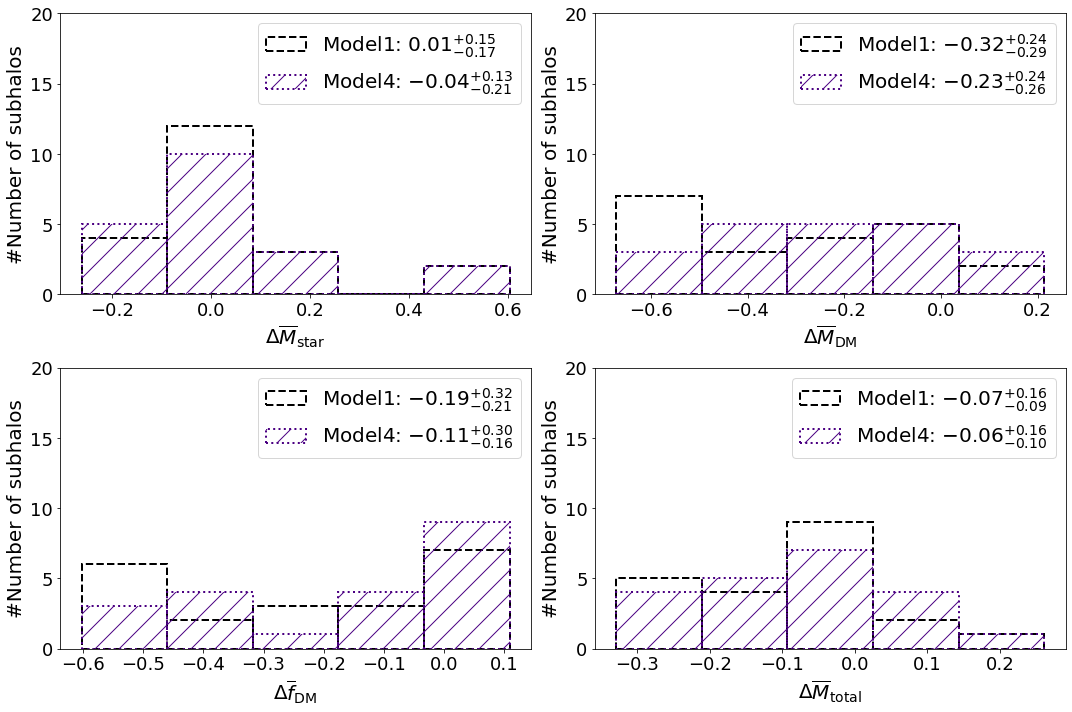

In [7]:
## Bias as a function of the Triaxiality

plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)

# Criar a figura com subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Adicionar os dados aos subplots
    # Stellar mass
m, hi, lo = median_hi_lo(Jam_star_model1)  
_, bins, _ = axs[0, 0].hist(Jam_star_model1, bins=5, density=False, fill=False,
                 label="Model1: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo), edgecolor='black',linestyle='--',  linewidth=2)

m, hi, lo = median_hi_lo(Jam_star_model4)
axs[0, 0].hist(Jam_star_model4, bins=bins, density=False, fill=False, hatch="/",
                 label="Model4: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo), edgecolor='indigo',linestyle=':',  linewidth=2)
               

axs[0, 0].set_ylabel("#Number of subhalos", size=20)
axs[0, 0].set_xlabel(r"${\Delta \overline{M}_{\rm star}}$", size=20)
axs[0, 0].legend(fontsize=20)
axs[0, 0].set_ylim(0,20)



    # DM mass
m, hi, lo = median_hi_lo(Jam_DM_model1)  
_, bins, _ = axs[0, 1].hist(Jam_DM_model1, bins=5, density=False,  fill=False,
                 label="Model1: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo), edgecolor='black',linestyle='--',  linewidth=2)

m, hi, lo = median_hi_lo(Jam_DM_model4)  
axs[0, 1].hist(Jam_DM_model4, bins=bins, density=False, hatch="/", fill=False,
                 label="Model4: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo), edgecolor='indigo',linestyle=':',  linewidth=2)

axs[0, 1].set_ylabel("#Number of subhalos", size=20)
axs[0, 1].set_xlabel(r"${\Delta \overline{M}_{\rm DM}}$", size=20)
axs[0, 1].legend(fontsize=20)
axs[0, 1].set_ylim(0,20)


    # DM fraction
m, hi, lo = median_hi_lo(Jam_fdm_model1)  
_, bins, _ = axs[1, 0].hist(Jam_fdm_model1, bins=5, density=False,  fill=False,
                 label="Model1: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo), edgecolor='black',linestyle='--',  linewidth=2)

m, hi, lo = median_hi_lo(Jam_fdm_model4)  
axs[1, 0].hist(Jam_fdm_model4, bins=bins, density=False, hatch="/", fill=False,
                 label="Model4: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo), edgecolor='indigo',linestyle=':',  linewidth=2)

axs[1, 0].set_ylabel("#Number of subhalos", size=20)
axs[1, 0].set_xlabel(r"${\Delta \overline{f}_{\rm DM}}$", size=20)
axs[1, 0].legend(fontsize=20)
axs[1, 0].set_ylim(0,20)



    # Total mass
m, hi, lo = median_hi_lo(Jam_total_model1)  
_, bins, _ = axs[1, 1].hist(Jam_total_model1, bins=5, density=False,  fill=False,
                 label="Model1: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo), edgecolor='black',linestyle='--',  linewidth=2)

m, hi, lo = median_hi_lo(Jam_total_model4)  
axs[1, 1].hist(Jam_total_model4, bins=bins, density=False,  hatch="/", fill=False,
                 label="Model4: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo), edgecolor='indigo',linestyle=':',  linewidth=2)

axs[1, 1].set_ylabel("#Number of subhalos", size=20)
axs[1, 1].set_xlabel(r"${\Delta \overline{M}_{\rm total}}$", size=20)
axs[1, 1].legend(fontsize=20)
axs[1, 1].set_ylim(0,20)

# Adicionar uma única legenda para todos os subplots
#fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True)

# Ajustar o layout
plt.tight_layout()
plt.savefig('/home/carlosmelo/Desktop/plots/DM_comparison_dynamics_3D.png', dpi=600,  bbox_inches='tight') 

### Slopes

In [7]:
TPL_slope1  = np.empty([Nsubhalos]) # "True" PL_slope1
TAV_slope1  = np.empty([Nsubhalos]) # "True" AV_slope1
TPL_slope2  = np.empty([Nsubhalos]) # "True" PL_slope2
TAV_slope2  = np.empty([Nsubhalos]) # "True" AV_slope2

MPL_slope1_model1  = np.empty([Nsubhalos]) # model PL_slope1
MAV_slope1_model1  = np.empty([Nsubhalos]) # model AV_slope1
MPL_slope2_model1  = np.empty([Nsubhalos]) # model PL_slope2
MAV_slope2_model1  = np.empty([Nsubhalos]) # model AV_slope2

MPL_slope1_model4  = np.empty([Nsubhalos]) # model PL_slope1
MAV_slope1_model4  = np.empty([Nsubhalos]) # model AV_slope1
MPL_slope2_model4  = np.empty([Nsubhalos]) # model PL_slope2
MAV_slope2_model4  = np.empty([Nsubhalos]) # model AV_slope2

for i, s in enumerate(subhalos):
    with open("./{}/model1/normal/JAM/Analysis_2.5Reff/quantities.json".format(s)) as f:
        model1 = json.load(f)
        f.close()
        
    with open("./{}/model4/normal/JAM/Analysis_2.5Reff/quantities.json".format(s)) as f:
        model4 = json.load(f)
        f.close()
        
    # True data
    log_img = fits.open("/home/carlosmelo/Documents/GitHub/Illustris/my_illustris/TNG50-1-snap84-subhalo{}/imgs/log_img.fits".format(s))
    
    TPL_slope1[i] = -log_img[1].data["PL_slope1"] 
    TAV_slope1[i] = log_img[1].data["AV_slope1"] 
    TPL_slope2[i] = -log_img[1].data["PL_slope2"] 
    TAV_slope2[i] = log_img[1].data["AV_slope2"]
    ############################################
        #Models
        
    #Model1
    MPL_slope1_model1[i]  = -model1["PL_slope1"]
    MAV_slope1_model1[i]  = model1["AV_slope1"]
    MPL_slope2_model1[i]  = -model1["PL_slope2"]
    MAV_slope2_model1[i]  = model1["AV_slope2"]
    
    #Model3
    MPL_slope1_model4[i]  = -model4["PL_slope1"]
    MAV_slope1_model4[i]  = model4["AV_slope1"]
    MPL_slope2_model4[i]  = -model4["PL_slope2"]
    MAV_slope2_model4[i]  = model4["AV_slope2"]

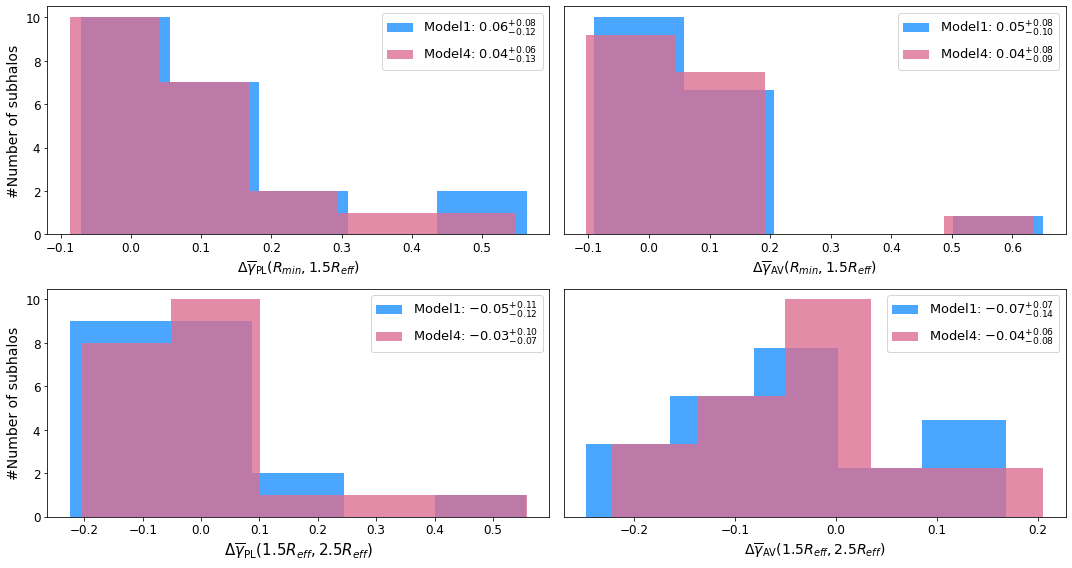

In [8]:
plt.figure(figsize=(15,8))


plt.subplot(221) # PL slope 1
    # Model1
diff1 = (MPL_slope1_model1 - TPL_slope1)/TPL_slope1
m, hi, lo = median_hi_lo( diff1 )
_ = plt.hist(diff1, bins=5, density=False,  color="dodgerblue", alpha=0.8,
                 label="Model1: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))
    
    # Model4
diff4 = (MPL_slope1_model4 - TPL_slope1)/TPL_slope1
m, hi, lo = median_hi_lo( diff4 )
_ = plt.hist(diff4, bins=5, density=False, alpha=0.8,  color="palevioletred",
             label="Model4: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

plt.legend(fontsize=13)
plt.ylabel("#Number of subhalos", size=14)
plt.xlabel(r"$\Delta \overline{\gamma}_{\rm PL}(R_{min},1.5R_{eff})$", size=14)
plt.xticks(size=12)
plt.yticks(size=12)


plt.subplot(222) # AV slope 1
       # Model1
diff1 = (MAV_slope1_model1 - TAV_slope1)/TAV_slope1
m, hi, lo = median_hi_lo( diff1 )
_ = plt.hist(diff1, bins=5, density=False,  color="dodgerblue", alpha=0.8,
                 label="Model1: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

    # Model4
diff4 = (MAV_slope1_model4 - TAV_slope1)/TAV_slope1
m, hi, lo = median_hi_lo( diff4 )
_ = plt.hist(diff4, bins=5, density=False, alpha=0.8, color="palevioletred",
             label="Model4: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

plt.legend(fontsize=13)
plt.xlabel(r"$\Delta \overline{\gamma}_{\rm AV}(R_{min},1.5R_{eff})$", size=14)
plt.xticks(size=12)
plt.yticks([])

plt.subplot(223) # PL slope 2
    # Model1
diff1 = (MPL_slope2_model1 - TPL_slope2)/TPL_slope2
m, hi, lo = median_hi_lo( diff1 )
_ = plt.hist(diff1, bins=5, density=False,  color="dodgerblue", alpha=0.8,
                 label="Model1: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

    # Model4
diff4 = (MPL_slope2_model4 - TPL_slope2)/TPL_slope2
m, hi, lo = median_hi_lo( diff4 )
_ = plt.hist(diff4, bins=5, density=False, alpha=0.8, color="palevioletred",
             label="Model4: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

plt.legend(fontsize=13)
plt.ylabel("#Number of subhalos", size=14)
plt.xlabel(r"$\Delta \overline{\gamma}_{\rm PL}(1.5R_{eff},2.5R_{eff})$", size=15)

plt.xticks(size=12)
plt.yticks(size=12)

plt.subplot(224) # AV slope 2
       # Model1
diff1 = (MAV_slope2_model1 - TAV_slope2)/TAV_slope2
m, hi, lo = median_hi_lo( diff1 )
_ = plt.hist(diff1, bins=5, density=False, color="dodgerblue", alpha=0.8,
                 label="Model1: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

    # Model4
diff4 = (MAV_slope2_model4 - TAV_slope2)/TAV_slope2
m, hi, lo = median_hi_lo( diff4 )
_ = plt.hist(diff4, bins=5, density=False, alpha=0.8, color="palevioletred",
             label="Model4: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

plt.legend(fontsize=13)
plt.xlabel(r"$\Delta \overline{\gamma}_{\rm AV}(1.5R_{eff},2.5R_{eff})$", size=14)
plt.xticks(size=12)
plt.yticks([])



plt.tight_layout()

---

### dyLens models

In [8]:
# Where to store the Fractional difference
dyLens_star_model1 = np.empty([Nsubhalos])       # dyLens measurement of stellar mass 
dyLens_star_model4 = np.empty([Nsubhalos])       # dyLens measurement of stellar mass 


dyLens_DM_model1 = np.empty([Nsubhalos])         # dyLens measurement of DM mass 
dyLens_DM_model4 = np.empty([Nsubhalos])         # dyLens measurement of DM mass 

dyLens_fdm_model1 = np.empty([Nsubhalos])        # dyLens measurement of fDM mass 
dyLens_fdm_model4 = np.empty([Nsubhalos])        # dyLens measurement of fDM mass 

dyLens_total_model1 = np.empty([Nsubhalos])      # JAM measurement of total mass 
dyLens_total_model4 = np.empty([Nsubhalos])      # JAM measurement of total mass 

In [9]:
for i, idNum in enumerate(subhalos):

    with open("./{}/model1/normal/shear/dyLens/phase5/Analysis_2.5Reff/quantities.json".format(idNum)) as f:
        model1 = json.load(f)
        f.close()
    
    with open("./{}/model4/normal/shear/dyLens/phase5/Analysis_2.5Reff/quantities.json".format(idNum)) as f:
        model4 = json.load(f)
        f.close()
    

    

    
    dyLens_star_model1[i] = model1["Dstar"]
    dyLens_star_model4[i] = model4["Dstar"]
    
    dyLens_DM_model1[i] = model1["Ddm"]
    dyLens_DM_model4[i] = model4["Ddm"]
    
    dyLens_total_model1[i] = model1["Dtotal"]
    dyLens_total_model4[i] = model4["Dtotal"]

    dyLens_fdm_model1[i] = model1["Dfdm"]
    dyLens_fdm_model4[i] = model4["Dfdm"]
    
    Mstar[i]  = model1["Mstar"]
    Mdm[i]    = model1["Mdm"]
    Mtotal[i] = model1["Mtotal"] 
    Mfdm[i]   = model1["fdm"]

In [ ]:
## Bias as a function of the Triaxiality

plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)

# Criar a figura com subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Adicionar os dados aos subplots
    # Stellar mass
m, hi, lo = median_hi_lo(dyLens_star_model1)  
_, bins, _ = axs[0, 0].hist(dyLens_star_model1, bins=5, density=False,  fill=False,
                 label="Model1: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo), edgecolor='black',linestyle='--',  linewidth=2)

m, hi, lo = median_hi_lo(dyLens_star_model4)
axs[0, 0].hist(dyLens_star_model4, bins=bins, density=False, hatch="/", fill=False,
                 label="Model4: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo), edgecolor='indigo',linestyle=':',  linewidth=2)


axs[0, 0].set_ylabel("#Number of subhalos", size=20)
axs[0, 0].set_xlabel(r"${\Delta \overline{M}_{\rm star}}$", size=20)
axs[0, 0].legend(fontsize=20)
axs[0, 0].set_ylim(0,20)


    # DM mass
m, hi, lo = median_hi_lo(dyLens_DM_model1)  
_, bins, _ = axs[0, 1].hist(dyLens_DM_model1, bins=5, density=False, fill=False,
                 label="Model1: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo), edgecolor='black',linestyle='--',  linewidth=2)

m, hi, lo = median_hi_lo(dyLens_DM_model4)  
axs[0, 1].hist(dyLens_DM_model4, bins=bins, density=False, hatch="/", fill=False,
                 label="Model4: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo), edgecolor='indigo',linestyle=':',  linewidth=2)


axs[0, 1].set_ylabel("#Number of subhalos", size=20)
axs[0, 1].set_xlabel(r"${\Delta \overline{M}_{\rm DM}}$", size=20)
axs[0, 1].legend(fontsize=20)
axs[0, 1].set_ylim(0,20)

    # DM fraction
m, hi, lo = median_hi_lo(dyLens_fdm_model1)  
_, bins, _ = axs[1, 0].hist(dyLens_fdm_model1, bins=5, density=False,  fill=False,
                 label="Model1: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo), edgecolor='black',linestyle='--',  linewidth=2)

m, hi, lo = median_hi_lo(dyLens_fdm_model4)  
axs[1, 0].hist(dyLens_fdm_model4, bins=bins, density=False,  hatch="/", fill=False,
                 label="Model4: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo), edgecolor='indigo',linestyle=':',  linewidth=2)


axs[1, 0].set_ylabel("#Number of subhalos", size=20)
axs[1, 0].set_xlabel(r"${\Delta \overline{f}_{\rm DM}}$", size=20)
axs[1, 0].legend(fontsize=20)
axs[1, 0].set_ylim(0,20)



    # Total mass
m, hi, lo = median_hi_lo(dyLens_total_model1)  
_, bins, _ = axs[1, 1].hist(dyLens_total_model1, bins=5, density=False,  fill=False,
                 label="Model1: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo), edgecolor='black',linestyle='--',  linewidth=2)

m, hi, lo = median_hi_lo(dyLens_total_model4)  
axs[1, 1].hist(dyLens_total_model4, bins=bins, density=False, hatch="/", fill=False,
                 label="Model4: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo), edgecolor='indigo',linestyle=':',  linewidth=2)


axs[1, 1].set_ylabel("#Number of subhalos", size=20)
axs[1, 1].set_xlabel(r"${\Delta \overline{M}_{\rm total}}$", size=20)
axs[1, 1].legend(fontsize=20)
axs[1, 1].set_ylim(0,20)


# Adicionar uma única legenda para todos os subplots
#fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True)

# Ajustar o layout
plt.tight_layout()
plt.savefig('/home/carlosmelo/Desktop/plots/DM_comparison_dyLens_3D.png', dpi=600,  bbox_inches='tight') 

## Slopes

In [12]:
TPL_slope1  = np.empty([Nsubhalos]) # "True" PL_slope1
TAV_slope1  = np.empty([Nsubhalos]) # "True" AV_slope1
TPL_slope2  = np.empty([Nsubhalos]) # "True" PL_slope2
TAV_slope2  = np.empty([Nsubhalos]) # "True" AV_slope2

MPL_slope1_model1  = np.empty([Nsubhalos]) # model PL_slope1
MAV_slope1_model1  = np.empty([Nsubhalos]) # model AV_slope1
MPL_slope2_model1  = np.empty([Nsubhalos]) # model PL_slope2
MAV_slope2_model1  = np.empty([Nsubhalos]) # model AV_slope2

MPL_slope1_model4  = np.empty([Nsubhalos]) # model PL_slope1
MAV_slope1_model4  = np.empty([Nsubhalos]) # model AV_slope1
MPL_slope2_model4  = np.empty([Nsubhalos]) # model PL_slope2
MAV_slope2_model4  = np.empty([Nsubhalos]) # model AV_slope2



for i, s in enumerate(subhalos):
    with open("./{}/model1/normal/shear/dyLens/phase5/Analysis_2.5Reff/quantities.json".format(s)) as f:
        model1 = json.load(f)
        f.close()
        
    with open("./{}/model4/normal/shear/dyLens/phase5/Analysis_2.5Reff/quantities.json".format(s)) as f:
        model4 = json.load(f)
        f.close()
        
    # True data
    log_img = fits.open("/home/carlosmelo/Documents/GitHub/Illustris/my_illustris/TNG50-1-snap84-subhalo{}/imgs/log_img.fits".format(s))
    
    TPL_slope1[i] = -log_img[1].data["PL_slope1"] 
    TAV_slope1[i] = log_img[1].data["AV_slope1"] 
    TPL_slope2[i] = -log_img[1].data["PL_slope2"] 
    TAV_slope2[i] = log_img[1].data["AV_slope2"]
    ############################################
        #Models
        
    #Model1
    MPL_slope1_model1[i]  = -model1["PL_slope1"]
    MAV_slope1_model1[i]  = model1["AV_slope1"]
    MPL_slope2_model1[i]  = -model1["PL_slope2"]
    MAV_slope2_model1[i]  = model1["AV_slope2"]
    
    
    #Model3
    MPL_slope1_model4[i]  = -model4["PL_slope1"]
    MAV_slope1_model4[i]  = model4["AV_slope1"]
    MPL_slope2_model4[i]  = -model4["PL_slope2"]
    MAV_slope2_model4[i]  = model4["AV_slope2"]

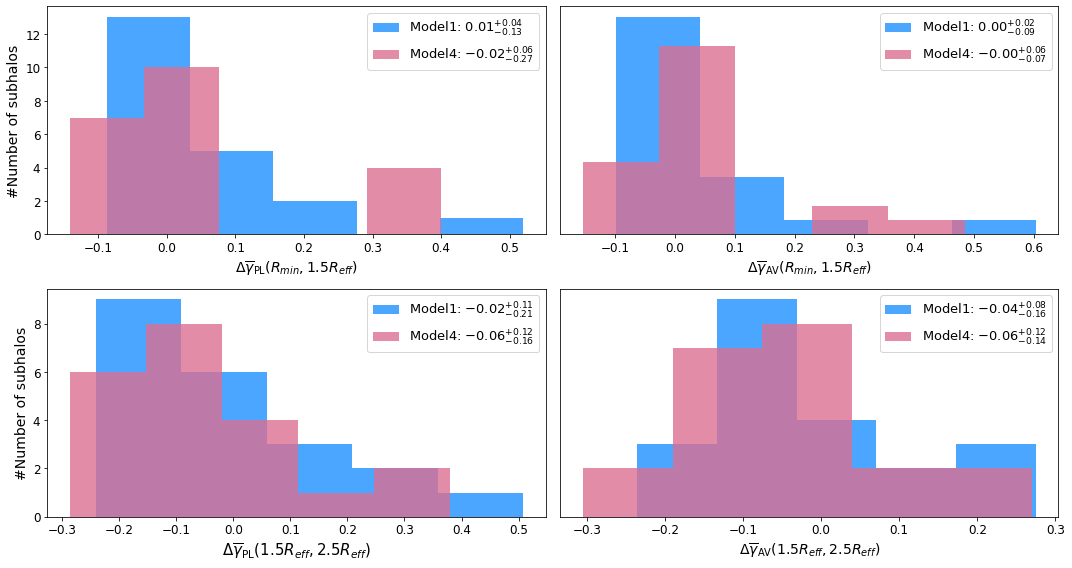

In [13]:
plt.figure(figsize=(15,8))


plt.subplot(221) # PL slope 1
    # Model1
diff1 = (MPL_slope1_model1 - TPL_slope1)/TPL_slope1
m, hi, lo = median_hi_lo( diff1 )
_ = plt.hist(diff1, bins=5, density=False,  color="dodgerblue", alpha=0.8,
                 label="Model1: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))
    
    # Model4
diff4 = (MPL_slope1_model4 - TPL_slope1)/TPL_slope1
m, hi, lo = median_hi_lo( diff4 )
_ = plt.hist(diff4, bins=5, density=False, alpha=0.8,  color="palevioletred",
             label="Model4: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

plt.legend(fontsize=13)
plt.ylabel("#Number of subhalos", size=14)
plt.xlabel(r"$\Delta \overline{\gamma}_{\rm PL}(R_{min},1.5R_{eff})$", size=14)
plt.xticks(size=12)
plt.yticks(size=12)


plt.subplot(222) # AV slope 1
       # Model1
diff1 = (MAV_slope1_model1 - TAV_slope1)/TAV_slope1
m, hi, lo = median_hi_lo( diff1 )
_ = plt.hist(diff1, bins=5, density=False,  color="dodgerblue", alpha=0.8,
                 label="Model1: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

    # Model4
diff4 = (MAV_slope1_model4 - TAV_slope1)/TAV_slope1
m, hi, lo = median_hi_lo( diff4 )
_ = plt.hist(diff4, bins=5, density=False, alpha=0.8, color="palevioletred",
             label="Model4: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

plt.legend(fontsize=13)
plt.xlabel(r"$\Delta \overline{\gamma}_{\rm AV}(R_{min},1.5R_{eff})$", size=14)
plt.xticks(size=12)
plt.yticks([])

plt.subplot(223) # PL slope 2
    # Model1
diff1 = (MPL_slope2_model1 - TPL_slope2)/TPL_slope2
m, hi, lo = median_hi_lo( diff1 )
_ = plt.hist(diff1, bins=5, density=False,  color="dodgerblue", alpha=0.8,
                 label="Model1: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

    # Model4
diff4 = (MPL_slope2_model4 - TPL_slope2)/TPL_slope2
m, hi, lo = median_hi_lo( diff4 )
_ = plt.hist(diff4, bins=5, density=False, alpha=0.8, color="palevioletred",
             label="Model4: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

plt.legend(fontsize=13)
plt.ylabel("#Number of subhalos", size=14)
plt.xlabel(r"$\Delta \overline{\gamma}_{\rm PL}(1.5R_{eff},2.5R_{eff})$", size=15)

plt.xticks(size=12)
plt.yticks(size=12)

plt.subplot(224) # AV slope 2
       # Model1
diff1 = (MAV_slope2_model1 - TAV_slope2)/TAV_slope2
m, hi, lo = median_hi_lo( diff1 )
_ = plt.hist(diff1, bins=5, density=False, color="dodgerblue", alpha=0.8,
                 label="Model1: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

    # Model4
diff4 = (MAV_slope2_model4 - TAV_slope2)/TAV_slope2
m, hi, lo = median_hi_lo( diff4 )
_ = plt.hist(diff4, bins=5, density=False, alpha=0.8, color="palevioletred",
             label="Model4: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

plt.legend(fontsize=13)
plt.xlabel(r"$\Delta \overline{\gamma}_{\rm AV}(1.5R_{eff},2.5R_{eff})$", size=14)
plt.xticks(size=12)
plt.yticks([])



plt.tight_layout()

------

## Results whitin  R$_{\text{Eins}}$

### dyLens models

In [14]:
# Where to store the Fractional difference
dyLens_star_model1 = np.empty([Nsubhalos])       # dyLens measurement of stellar mass 
dyLens_star_model4 = np.empty([Nsubhalos])       # dyLens measurement of stellar mass 


dyLens_DM_model1 = np.empty([Nsubhalos])         # dyLens measurement of DM mass 
dyLens_DM_model4 = np.empty([Nsubhalos])         # dyLens measurement of DM mass 

dyLens_fdm_model1 = np.empty([Nsubhalos])        # dyLens measurement of fDM mass 
dyLens_fdm_model4 = np.empty([Nsubhalos])        # dyLens measurement of fDM mass 

dyLens_total_model1 = np.empty([Nsubhalos])      # JAM measurement of total mass 
dyLens_total_model4 = np.empty([Nsubhalos])      # JAM measurement of total mass 

In [15]:
for i, idNum in enumerate(subhalos):

    with open("./{}/model1/normal/shear/dyLens/phase5/Analysis_Re/quantities.json".format(idNum)) as f:
        model1 = json.load(f)
        f.close()
    
    with open("./{}/model4/normal/shear/dyLens/phase5/Analysis_Re/quantities.json".format(idNum)) as f:
        model4 = json.load(f)
        f.close()

    
    dyLens_star_model1[i] = model1["Dstar"]
    dyLens_star_model4[i] = model4["Dstar"]
    
    dyLens_DM_model1[i] = model1["Ddm"]
    dyLens_DM_model4[i] = model4["Ddm"]
    
    dyLens_total_model1[i] = model1["Dtotal"]
    dyLens_total_model4[i] = model4["Dtotal"]

    dyLens_fdm_model1[i] = model1["Dfdm"]
    dyLens_fdm_model4[i] = model4["Dfdm"]
    
    Mstar[i]  = model1["Mstar"]
    Mdm[i]    = model1["Mdm"]
    Mtotal[i] = model1["Mtotal"] 
    Mfdm[i]   = model1["fdm"]

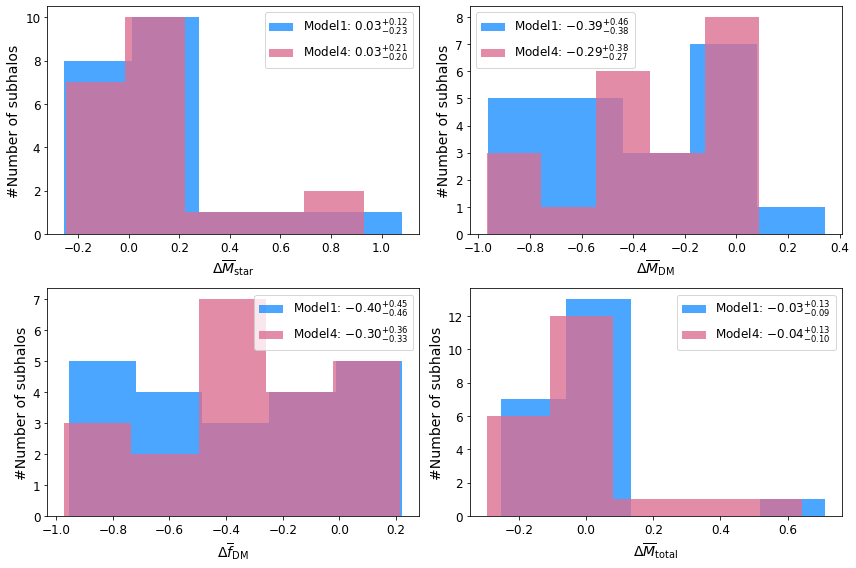

In [16]:
## Bias as a function of the Triaxiality

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

# Criar a figura com subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Adicionar os dados aos subplots
    # Stellar mass
m, hi, lo = median_hi_lo(dyLens_star_model1)  
axs[0, 0].hist(dyLens_star_model1, bins=5, density=False,  color="dodgerblue", alpha=0.8,
                 label="Model1: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

m, hi, lo = median_hi_lo(dyLens_star_model4)
axs[0, 0].hist(dyLens_star_model4, bins=5, density=False, alpha=0.8, color="palevioletred",
                 label="Model4: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

axs[0, 0].set_ylabel("#Number of subhalos", size=14)
axs[0, 0].set_xlabel(r"${\Delta \overline{M}_{\rm star}}$", size=14)
axs[0, 0].legend(fontsize=12)


    # DM mass
m, hi, lo = median_hi_lo(dyLens_DM_model1)  
axs[0, 1].hist(dyLens_DM_model1, bins=5, density=False,  color="dodgerblue", alpha=0.8,
                 label="Model1: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

m, hi, lo = median_hi_lo(dyLens_DM_model4)  
axs[0, 1].hist(dyLens_DM_model4, bins=5, density=False,  alpha=0.8, color="palevioletred",
                 label="Model4: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

axs[0, 1].set_ylabel("#Number of subhalos", size=14)
axs[0, 1].set_xlabel(r"${\Delta \overline{M}_{\rm DM}}$", size=14)
axs[0, 1].legend(fontsize=12)

    # DM fraction
m, hi, lo = median_hi_lo(dyLens_fdm_model1)  
axs[1, 0].hist(dyLens_fdm_model1, bins=5, density=False,  color="dodgerblue", alpha=0.8,
                 label="Model1: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

m, hi, lo = median_hi_lo(dyLens_fdm_model4)  
axs[1, 0].hist(dyLens_fdm_model4, bins=5, density=False,  alpha=0.8, color="palevioletred",
                 label="Model4: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

axs[1, 0].set_ylabel("#Number of subhalos", size=14)
axs[1, 0].set_xlabel(r"${\Delta \overline{f}_{\rm DM}}$", size=14)
axs[1, 0].legend(fontsize=12)


    # Total mass
m, hi, lo = median_hi_lo(dyLens_total_model1)  
axs[1, 1].hist(dyLens_total_model1, bins=5, density=False,  color="dodgerblue", alpha=0.8,
                 label="Model1: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

m, hi, lo = median_hi_lo(dyLens_total_model4)  
axs[1, 1].hist(dyLens_total_model4, bins=5, density=False,  alpha=0.8, color="palevioletred",
                 label="Model4: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

axs[1, 1].set_ylabel("#Number of subhalos", size=14)
axs[1, 1].set_xlabel(r"${\Delta \overline{M}_{\rm total}}$", size=14)
axs[1, 1].legend(fontsize=12)

# Adicionar uma única legenda para todos os subplots
#fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True)

# Ajustar o layout
plt.tight_layout()

----